In [1]:
import warnings;warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')

from sklearn.preprocessing import LabelEncoder

In [2]:
data_dir = '../data/new'
train_df = pd.read_csv(f"{data_dir}/new_train_ver3.csv")
test_df = pd.read_csv(f"{data_dir}/new_test_ver3.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 42 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   본번                      1118822 non-null  float64
 1   부번                      1118822 non-null  float64
 2   아파트명                    1118822 non-null  object 
 3   전용면적                    1118822 non-null  float64
 4   층                       1118822 non-null  int64  
 5   건축년도                    1118822 non-null  int64  
 6   도로명                     1118822 non-null  object 
 7   해제사유발생일                 5983 non-null     float64
 8   등기신청일자                  1118822 non-null  object 
 9   거래유형                    1118822 non-null  object 
 10  부동산유형                   1118822 non-null  object 
 11  분양형태                    1118822 non-null  object 
 12  k-관리방식                  1118822 non-null  object 
 13  k-복도유형                  1118822 non-null  object 
 14  k-

# Q1.동일한 아파트를 거래했음에도 왜 가격이 다른가?

In [4]:
target = "노블레스"
data = train_df[train_df['아파트명'] == f'{target}']
print(data.shape)

data.to_csv(f"./{target}.csv", index=False)

(110, 42)


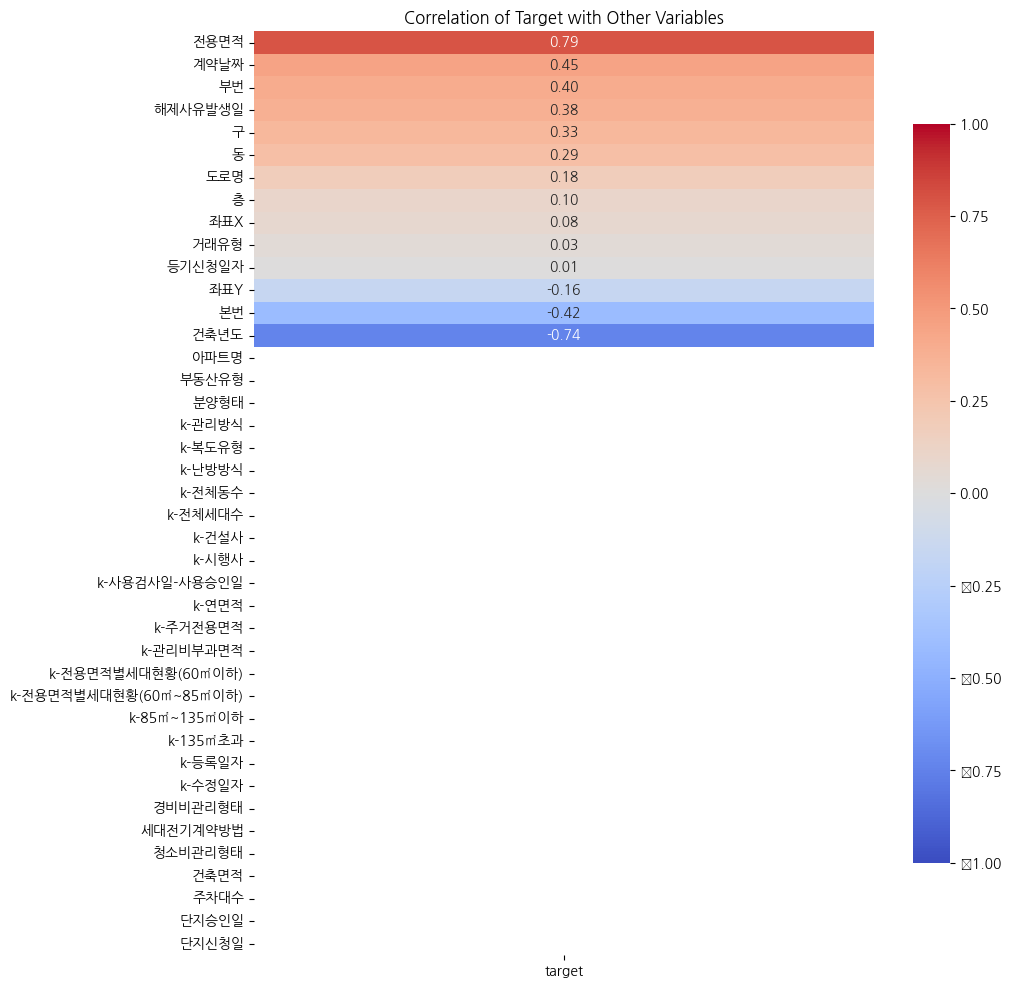

In [5]:
# Convert date columns to datetime
date_columns = ['해제사유발생일', '등기신청일자', '단지승인일', '단지신청일', '계약날짜']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Fill NaN values in date columns with a default date
default_date = pd.to_datetime('1900-01-01')
data[date_columns] = data[date_columns].fillna(default_date)

# Encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract correlations of the 'target' column with other variables
target_correlations = correlation_matrix[['target']].drop('target').sort_values(by='target', ascending=False)

# Plot the target correlations
plt.figure(figsize=(10, 12))
sns.heatmap(target_correlations, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title('Correlation of Target with Other Variables')
plt.show()

## 2.분양형태에 따른 가격의 변동성

파악하기 어려움

In [6]:
train_df['분양형태'].value_counts()

분양형태
unknown    910249
분양         206371
임대           2202
Name: count, dtype: int64

In [7]:
list(train_df['아파트명'].unique())

['개포6차우성',
 '개포우성3차',
 '개포자이',
 '개포주공1단지',
 '개포주공5단지',
 '개포주공6단지',
 '동양파라곤',
 '마일스디오빌',
 '아크로힐스논현',
 '대치삼성',
 '대치현대',
 '대치효성',
 '래미안대치하이스턴',
 '롯데캐슬리베',
 '테헤란로대우아이빌',
 '도곡렉슬',
 '도곡쌍용예가',
 '도곡우성',
 '래미안도곡카운티',
 '대치아이파크',
 '은마',
 '개포주공4단지',
 '개포주공7단지',
 '개포현대200동',
 '경남1',
 '경남2차',
 '뉴현대파크빌',
 '리치타운',
 '삼익대청',
 '새롬',
 '성원대치2단지',
 '시영',
 '아람손프라자/비바빌',
 '에버그린',
 '우성8',
 '우성9차',
 '우찬현대',
 '현대',
 '현대1차101동~106동',
 '현대2',
 'e-편한세상',
 '거평프리젠',
 '경남논현',
 '골든캐슬',
 '논현동월드메르디앙',
 '논현동프라임',
 '논현동한화꿈에그린',
 '논현라폴리움',
 '논현베르빌',
 '논현빌라트',
 '논현아트빌',
 '논현웰스톤',
 '논현파라곤',
 '논현프라임',
 '논현한가람빌라트',
 '동부센트레빌',
 '동현',
 '두산위브1단지',
 '두산위브2단지',
 '두영',
 '벨러스빌',
 '브라운스톤',
 '스위트캐슬레지던스',
 '신동아',
 '쌍용',
 '우민',
 '우성',
 '월드쉐르빌',
 '이산',
 '이움빌라',
 '지고하임',
 '청학',
 '케럿스테이트',
 '케이씨빌',
 '토미빌',
 '프라임',
 '학동',
 '한양빌라트',
 '한양수자인어반게이트',
 '한진로즈힐',
 '한화꿈에그린2차',
 '현대넥서스A동',
 '현대인텔렉스',
 '개포우성1',
 '개포우성2',
 '대우아이빌멤버스',
 '대우아이빌명문가',
 '대치SKVIEW',
 '대치동우정에쉐르1',
 '대치동우정에쉐르2',
 '대치우성',
 '대치하나빌',
 '대치한신휴플러스',
 '동민맥스빌A동',
 '동민맥스빌B동',
 '동양',
 '래

In [8]:
# 분양형태별 아파트명 집합 생성
set_sale = set(train_df[train_df['분양형태'] == '분양']['아파트명'])
# set_rent = set(train_df[train_df['분양형태'] == '임대']['아파트명'])
set_unknown = set(train_df[train_df['분양형태'] == 'unknown']['아파트명'])

# 교집합 찾기
intersection = set_sale & set_unknown

print("분양형태가 '분양', '임대', 'unknown' 각각 포함된 아파트명:", intersection)

분양형태가 '분양', '임대', 'unknown' 각각 포함된 아파트명: {'현대성우', '효성', '강변', '두산', '해태보라매타워', '대원칸타빌', '한진해모로', '한양', '서희스타힐스', '삼호한숲', '해모로', '동양파라곤', '보라매우성', '동부', '한화오벨리스크', '삼익', '아남', '대상', '신동아', '청솔', '태흥', '롯데캐슬', '경남아너스빌', '강변힐스테이트', '라이프', '한강', '대주피오레', '한가람', '성원', '서울', '세양청마루', '경향렉스빌', '우리유앤미', '현대3', '포레스트힐시티', '상아2차', '리첸시아용산', '동양엔파트', '쌍용예가클래식', '상록수', '신동아파밀리에'}


In [9]:
data = train_df[train_df['아파트명'] == '롯데캐슬']
print(data.shape)

data.to_csv("./롯데캐슬.csv", index=False)

(2968, 42)


In [10]:
data['분양형태'].value_counts()

분양형태
unknown    2788
분양          180
Name: count, dtype: int64

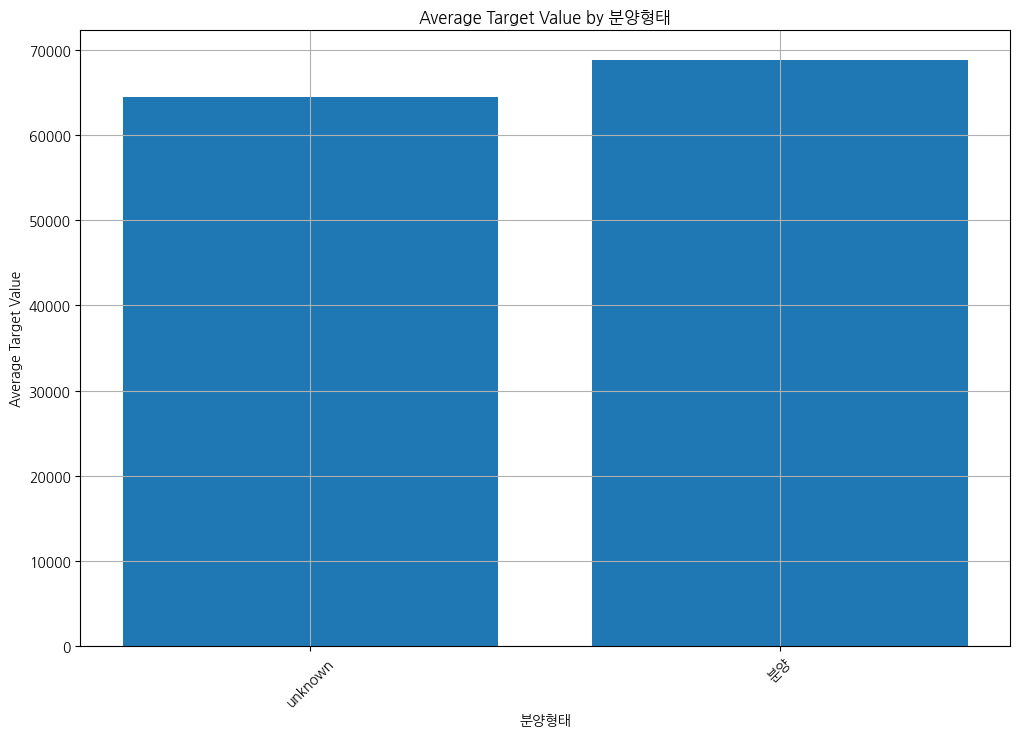

In [11]:
grouped_data = data.groupby('분양형태')['target'].mean().sort_values()

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('분양형태')
plt.ylabel('Average Target Value')
plt.title('Average Target Value by 분양형태')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3.구별 평균가격

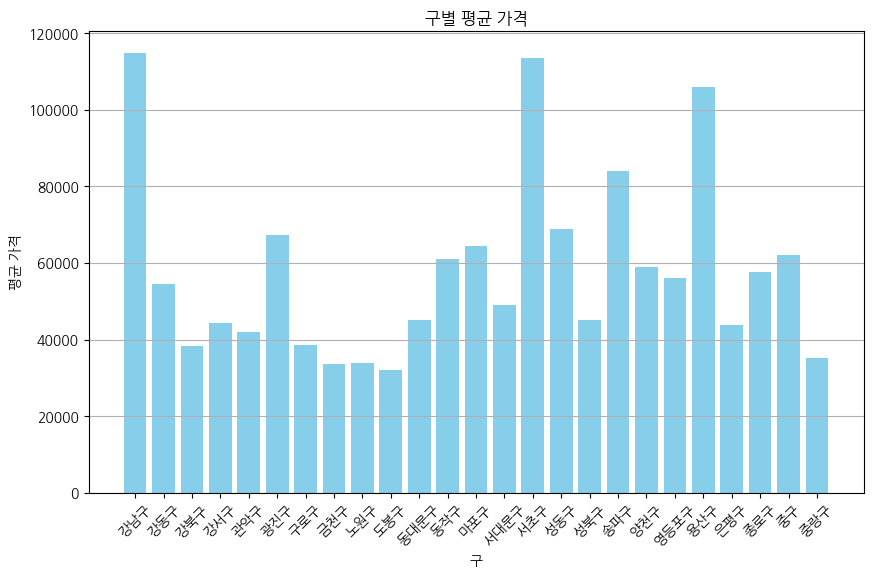

In [12]:
# 구별로 target의 평균 가격 계산
grouped_df = train_df.groupby('구')['target'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['구'], grouped_df['target'], color='skyblue')
plt.xlabel('구')
plt.ylabel('평균 가격')
plt.title('구별 평균 가격')
plt.xticks(rotation=45)
plt.grid(axis='y')

# 그래프 출력
plt.show()

# 4.동별 평균가격

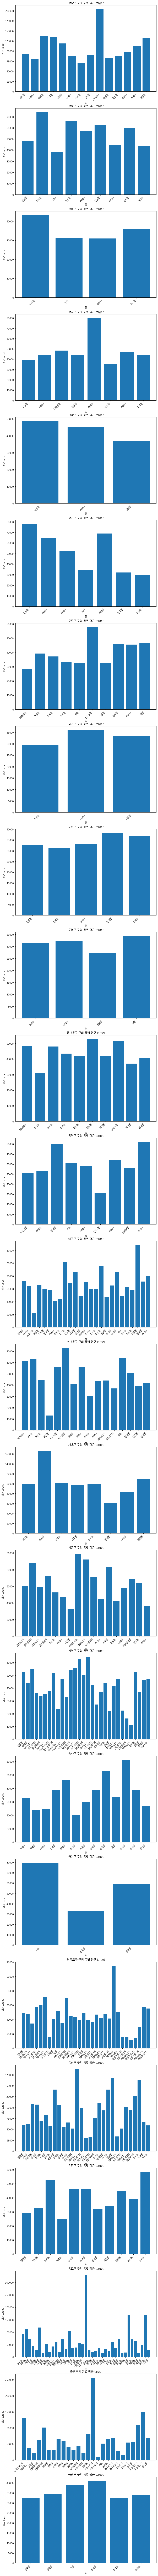

In [13]:
gu_groups = train_df.groupby('구')

# 각 구별로 플롯 생성
fig, axes = plt.subplots(nrows=len(gu_groups), ncols=1, figsize=(10, 6 * len(gu_groups)))
fig.tight_layout(pad=5.0)

for (gu, group_df), ax in zip(gu_groups, axes):
    mean_target_per_dong = group_df.groupby('동')['target'].mean().reset_index()
    ax.bar(mean_target_per_dong['동'], mean_target_per_dong['target'])
    ax.set_title(f'{gu} 구의 동별 평균 target')
    ax.set_xlabel('동')
    ax.set_ylabel('평균 target')
    ax.set_xticklabels(mean_target_per_dong['동'], rotation=45, ha='right')

plt.show()

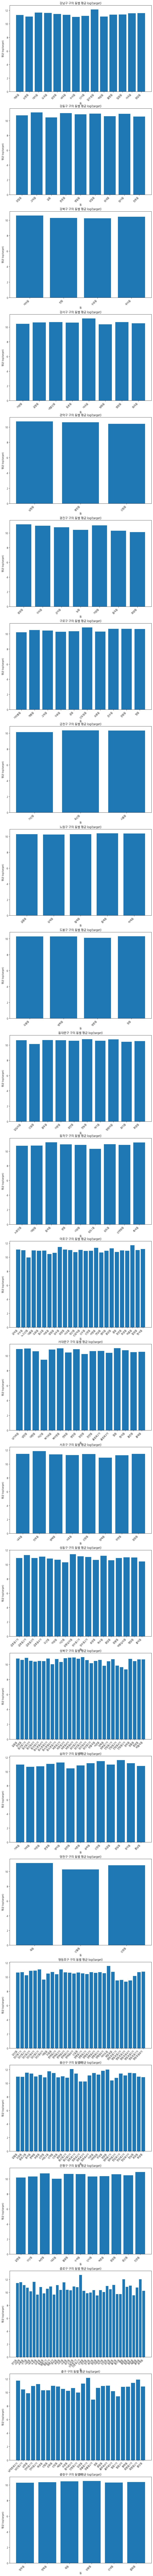

In [14]:
# 'target' 컬럼에 로그 변환 적용
train_df['log_target'] = np.log(train_df['target'])

gu_groups = train_df.groupby('구')

# 각 구별로 플롯 생성
fig, axes = plt.subplots(nrows=len(gu_groups), ncols=1, figsize=(10, 6 * len(gu_groups)))
fig.tight_layout(pad=5.0)

for (gu, group_df), ax in zip(gu_groups, axes):
    # 로그 변환된 'log_target'의 평균을 계산
    mean_log_target_per_dong = group_df.groupby('동')['log_target'].mean().reset_index()
    ax.bar(mean_log_target_per_dong['동'], mean_log_target_per_dong['log_target'])
    ax.set_title(f'{gu} 구의 동별 평균 log(target)')
    ax.set_xlabel('동')
    ax.set_ylabel('평균 log(target)')
    ax.set_xticklabels(mean_log_target_per_dong['동'], rotation=45, ha='right')

plt.show()